In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

# define rho
totrho = 2000
rho_min = 0
rho_max = 100
rho = np.linspace(rho_min, rho_max, totrho)

# define Puls potential
def PulsV(r, K):
    mh = 0.59
    me = 0.28
    return -2/r*(1-2*np.exp(-2*r*me/(K*mh))*(1+r*me/(K*mh)))

def Verlet(epsilon, l, K):
    # defining rho range
    totrho = 2000
    rho_min = 0
    rho_max = 100
    rho = np.linspace(rho_min, rho_max, totrho)
    drho = (rho_max)/(totrho)
    
    # initialize a zero list of length rho to hold wavefunction
    length = totrho
    f = [0]*length
   
    # set the end values of f; mind the indexing 
    f[length - 1] = 0
    f[length - 2] = 10**-10
    
    # Verlet Algorithm
    for i in range(length-2, 0, -1):
        f[i-1] = 2*f[i] - f[i+1] + drho**2*(-epsilon + PulsV(rho[i], K) + l*(l+1)/(rho[i]**2))*f[i]
    
    # normalize
    A = sum([x**2 for x in f])
    f = f/np.sqrt(A)
    return f # rho*psi 

# Begin main - Shooting/Bisection

# Define range and steps of K

K = np.linspace(1.9,2.0,10) 

# Allocate variable to hold solution

En = [0]*12
f_nl = [[0 for x in range(totrho)] for y in range(12)]

Etot = [0]*10
for i in range(10): # number of K iterations 
    for j in range(11): # number of energy levels for each K -1
        Etot[i] = np.append(Etot[i], [0]) # creating a position for each eigenvalue
    Etot[i] = [float(x) for x in Etot[i]]
    
Etot = np.array(Etot)

# Allocate variable to hold the difference between solution and BC
delta = [0]*2

# Define initial guess and increments
E1 = -1.1 
dE = 0.001
E2 = E1 + dE

# Define boundary condition 
BC_0 = 0

# Define tolerances
tolerance_min = 10**-10

# set up boolean 
Bisecting = False

for index in range(len(K)):
    count = 0 # index for each orbital for a specific K
    for l in range(3):
    
        for n in range(4):

        
            # Generate the wavefunction with initial guess
            f = Verlet(E1, l, K[index])
        
            # Define the difference between required BC and our generated boundary value
            delta[0] = f[0] - BC_0
            print('**************************n = ', n, ' l = ', l, ' K =', K[index], '***************************************')

            for i in range(10**6):
            
                # set up for E variables for iterations (incrementing energies)
                if not Bisecting:
                    E = E2
                
                if Bisecting:
                    E = 0.5*(E1 + E2) 
            
                # Generate the next wavefunction with new guess E
                f = Verlet(E, l, K[index])
            
                # Define the difference between required BC and new wavefunction boundary value 
                delta[1] = f[0] - BC_0
                
                # Check how close the wavefunction is to the answer
                if abs(delta[1]) < tolerance_min: # found answer
                    count += 1
                    En[count-1] = E
                    f_nl[count-1][:] = f
                    print('EigenEnergy is ', En[count-1], '!!!!!!!!!!!!!!!')

                    # prepare the E1 and E2 for the next energy eigenvalue
                    if n != 3: # if keeping the same l
                        E1 = E + dE/1000
                        E2 = E1 + dE
                
                    if n == 3: # if going onto next l, reseting E1 back to starting guess
                        E1 = -1.1
                        E2 = E1 + dE

                
                    # prepare boolean and continue iterative setup 
                    Bisecting = False 
                    break    
        
    
                # Determine how to increment E in each case
         
                # If the last step was already a bisection (the next step will be too): change the energy variables
                if Bisecting:
                    if delta[0]*delta[1] > 0: # depends on if the last two guess are on the same side of the solution
                        if E2_moved == True:  # depends on which variable was the last to move
                            E2 = E
                        else: 
                            E1 = E
                            E2_moved = False
                    else:
                        if E2_moved == True:
                            E1 = E
                            E2_moved = False
                        else: 
                            E2 = E
                            E2_moved = True
    
                # If the last step was not a bisection but the next one requires one
                if not Bisecting and delta[0]*delta[1] < 0:
                    Bisecting = True # Turn Bisecting boolean to true if the two deltas straddle 0 
                    E2 = E # will do first bisection at the beginning of the next iteration
                    E2_moved = True
                    print('bisection next step') 
        
                if not Bisecting:
                    E1 = E2
                    E2 += dE
        
                if i == 10**6:
                    print('Max iterations reached, please change your initial guess.')
                    break
    
                if E >= 0:
                    print('No solution found - Solution greater than zero')
                
    
        
                # switch over the values to keep up with the energy steps
                delta[0] = delta[1]    

    print(En)
    print(index)
    Etot[index] = En    
    print(Etot)

**************************n =  0  l =  0  K = 1.9 ***************************************


KeyboardInterrupt: 

In [4]:
# Saving file

import pandas as pd

name_dict = Etot

df = pd.DataFrame(name_dict)
df.style.hide_index()
df.to_csv('Puls_n4_K_1.5to2.4', index = False) # the other file is PulsEtot_K_0.1to2.8by0.3

In [22]:
# Run from here if data is already stored
import pandas as pd
import numpy as np
df = pd.read_csv('Puls_n4_K_1.9to2.8')
Etot = (np.array(df))

In [5]:
# Manipulate and re-organize Etot
Etot1 = [x*0.111*1000 for x in Etot] # in meV now

# add an element with value 0 to each set of eigenvalues for a specific K
# this will be represent n = infinite 
for i in range(10):
    Etot1[i] = np.append(Etot1[i], 0.0)

lvls = 13
# create nested list to hold the delta (the relative energies)
Edelta = [0]*10
for i in range(10): # number of K iterations 
    for j in range(lvls - 1): # number of energy levels for each K -1
        Edelta[i] = np.append(Edelta[i], [0]) # creating a position for each eigenvalue
    Edelta[i] = [float(x) for x in Edelta[i]]
    
Edelta = np.array(Edelta)

for i in range(10):
    for j in range(lvls):
        Edelta[i][j] = Etot1[i][j] - Etot1[i][0] 

# reorganize into lists holding the same orbit
# create nested loop 
Edelta_varyK = [0]*lvls # each energy level will have its own list
for i in range(lvls): # number of energy levels for each K
    for j in range(9): # number of K iterations -1
        Edelta_varyK[i] = np.append(Edelta_varyK[i], [0]) # creating a position for each eigenvalue
    Edelta_varyK[i] = [float(x) for x in Edelta_varyK[i]]
    
Edelta_varyK = np.array(Edelta_varyK)

for i in range(lvls):
    for j in range(10):
        Edelta_varyK[i][j] = Edelta[j][i]

# Put the orbits in order 
# Create nested loop
Edelta_order = [0]*lvls # each energy level will have its own list
for i in range(lvls): # number of energy levels for each K
    for j in range(9): # number of K iterations -1
        Edelta_order[i] = np.append(Edelta_order[i], [0]) # creating a position for each eigenvalue
    Edelta_order[i] = [float(x) for x in Edelta_order[i]]
    
Edelta_order = np.array(Edelta_order)

Edelta_order[0] = Edelta_varyK[0]
Edelta_order[1] = Edelta_varyK[4]
Edelta_order[2] = Edelta_varyK[8]
Edelta_order[3] = Edelta_varyK[1]
Edelta_order[4] = Edelta_varyK[5]
Edelta_order[5] = Edelta_varyK[9]
Edelta_order[6] = Edelta_varyK[2]
Edelta_order[7] = Edelta_varyK[6]
Edelta_order[8] = Edelta_varyK[10]
Edelta_order[9] = Edelta_varyK[3]
Edelta_order[10] = Edelta_varyK[7]
Edelta_order[11] = Edelta_varyK[11]
Edelta_order[12] = Edelta_varyK[12]

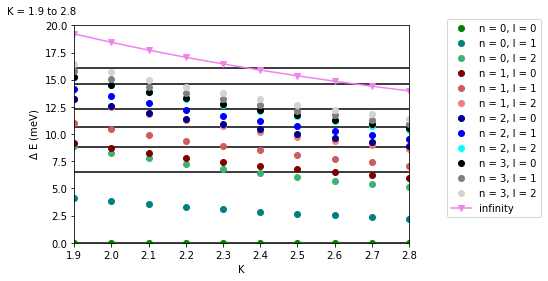

In [25]:
# plotting
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# DEFINE X-AXIS
xmin = 1.9
xmax = 2.8

K = np.linspace(xmin,xmax,10) 

gr = [-16.04+16.04]*len(K)
ex1 = [-9.53+16.04]*len(K)
ex2 = [-7.21+16.04]*len(K)
ex3 = [-5.4+16.04]*len(K)
ex4 = [-3.74+16.04]*len(K)
ex5 = [-1.39+16.04]*len(K)
ex6 = [0+16.04]*len(K)

fig = plt.figure()
ax = plt.subplot(111)

data = [gr, ex1, ex2, ex3, ex4, ex5, ex6]
for i in range(len(data)):
    plt.plot(K, data[i], color = 'k')

lbel = ['n = 0, l = 0', 'n = 0, l = 1', 'n = 0, l = 2', 'n = 1, l = 0', 'n = 1, l = 1', 'n = 1, l = 2', 'n = 2, l = 0', 'n = 2, l = 1', 'n = 2, l = 2', 'n = 3, l = 0',
       'n = 3, l = 1', 'n = 3, l = 2', 'infinity']
clor = ['green', 'teal','mediumseagreen', 'maroon', 'indianred', 'lightcoral', 'darkblue', 'blue', 'aqua',
       'k', 'grey', 'lightgray', 'violet']

for i in range(13):
    if i != 12:
        ax.plot(K, Edelta_order[i], 'o', label = lbel[i], color = clor[i])
    else:
        ax.plot(K, Edelta_order[i], '-v', label = lbel[i], color = clor[i])
plt.xlim(xmin, xmax)
plt.ylim(0,20)
lgd = ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.ylabel("$\Delta$ E (meV)")
plt.xlabel('K') # Change K Range
text = ax.text(-0.2,1.05, "K = 1.9 to 2.8", transform=ax.transAxes) # CHANGE K_RANGE
plt.savefig('PulsGa_K1.9_to_2.8wLegendMattStyle_legendOut_n4_infinity.png', bbox_extra_artists=(lgd, text), bbox_inches='tight')
plt.show()

****** The minimum of the Puls Potential is (in r_b)  1.35


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning:

divide by zero encountered in true_divide

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning:

divide by zero encountered in true_divide



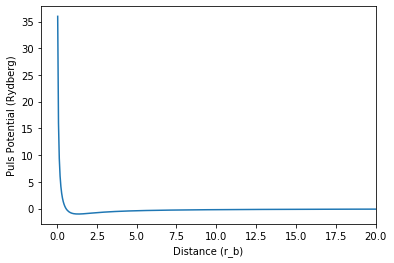

In [109]:
plt.plot(rho, PulsV(rho))
plt.xlim(-1, 20)
plt.ylabel("Puls Potential (Rydberg)")
plt.xlabel('Distance (r_b)')
Puls_list = PulsV(rho).tolist()
Puls_min = min(Puls_list[1::])
print('****** The minimum of the Puls Potential is (in r_b) ', Puls_list.index(Puls_min)/2000*100)